In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

data_file = "data/Takeout/Fit/Daily Aggregations/Daily Summaries.csv"

df = pd.read_csv(data_file)

df = df[['Date', 
         'Average diastolic blood pressure (mmHg)', 
         'Average systolic blood pressure (mmHg)', 
         'Walking duration (ms)',
         'Biking duration (ms)',
         'Mountain biking duration (ms)',
         'Calories (kcal)',
         'Distance (m)']]

df = df.sort_values(by=['Date'])

# Tweak some fields around to make them more usable
df['Biking duration (s)'] = df['Biking duration (ms)'].fillna(0) + df['Mountain biking duration (ms)'].fillna(0)
df['Biking duration (hours)'] = df['Biking duration (s)'] / (1000 * 60 * 60)
df['Walking duration (hours)'] = df['Walking duration (ms)'].fillna(0) / (1000 * 60 * 60) 
df['Distance (m)'] = df['Distance (m)'].fillna(0)
df['Datetime'] = pd.to_datetime(df['Date'])
df['Year'] = df['Datetime'].dt.year
df['Week'] = df['Datetime'].dt.week
df['Day Count'] = 1
df = df.drop(['Biking duration (ms)', 'Mountain biking duration (ms)', 'Walking duration (ms)', 'Date'], axis=1)

# Group by week
# Yes, there's an average of averages in there... but blood pressure isn't an exact science so no harm here
df = df.groupby(['Year', 'Week']).agg({
    'Average diastolic blood pressure (mmHg)': 'mean', 
    'Average systolic blood pressure (mmHg)': 'mean', 
    'Biking duration (hours)': 'sum',
    'Walking duration (hours)': 'sum',
    'Calories (kcal)': 'sum',
    'Distance (m)': 'sum',
    'Day Count': 'sum',
    'Week': 'max'
})

# Only want full weeks
google_data = df[df['Day Count'] == 7].dropna()

google_data.head(1000)

Average diastolic blood pressure (mmHg)  \
Year Week                                            
2019 15                                  94.000000   
     16                                  91.020431   
     17                                  90.428571   
     18                                  90.000000   
     19                                  92.666667   
     20                                  88.300000   
     21                                  86.285714   
     22                                  88.666667   
     23                                  88.808788   
     24                                  87.333333   

           Average systolic blood pressure (mmHg)  Biking duration (hours)  \
Year Week                                                                    
2019 15                                145.000000                 0.961097   
     16                                140.622505                 0.313189   
     17                                142.285714                 0.939453   
     18                                141.333333                 1.740077   
     19                                144.000000                 0.296085   
     20                                136.600000                 0.800627   
     21                                136.142857                 1.363603   
     22                                133.666667                 3.898814   
     23                                133.423018                 4.623440   
     24                                136.666667                 0.922102   

           Walking duration (hours)  Calories (kcal)  Distance (m)  Day Count  \
Year Week                                                                       
2019 15                   11.905849     19311.482866  41338.217438          7   
     16                   12.077749     18974.924116  44821.749235          7   
     17                   13.316962     19744.215406  42979.095955          7   
     18                   11.748733     19422.074738  46659.869240          7   
     19                    8.868330     17779.677104  21531.104596          7   
     20                   15.063880     20872.722322  62617.057499          7   
     21                   17.399181     21356.357342  72036.243751          7   
     22                    9.295621     19521.785915  69165.915321          7   
     23                    6.702938     19627.365926  97275.942231          7   
     24                    7.645814     17575.480414  37110.954258          7   

           Week  
Year Week        
2019 15      15  
     16      16  
     17      17  
     18      18  
     19      19  
     20      20  
     21      21  
     22      22  
     23      23  
     24      24

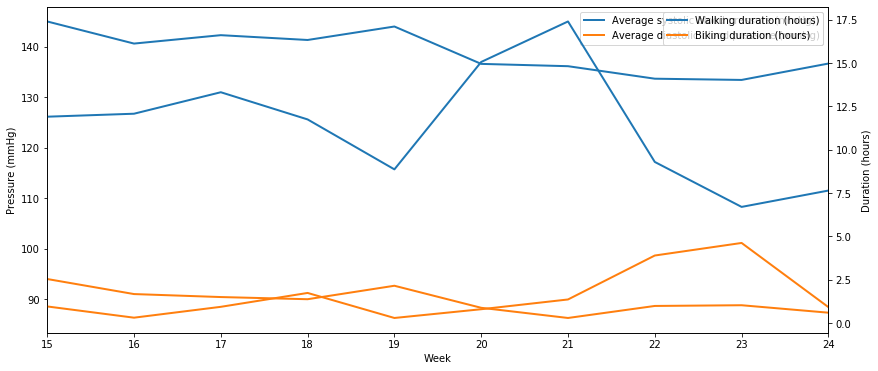

In [3]:
fig, ax1 = plt.subplots(figsize=(14, 6))
google_data.plot(ax=ax1, kind='line', x='Week', y='Average systolic blood pressure (mmHg)', linewidth=2.0)
google_data.plot(ax=ax1, kind='line', x='Week', y='Average diastolic blood pressure (mmHg)', linewidth=2.0)

ax2 = ax1.twinx()
google_data.plot(ax=ax2, kind='line', x='Week', y='Walking duration (hours)', linewidth=2.0)
google_data.plot(ax=ax2, kind='line', x='Week', y='Biking duration (hours)', linewidth=2.0)

ax1.set_ylabel('Pressure (mmHg)')
ax2.set_ylabel('Duration (hours)')
plt.show()